# <center> LightGBM原理与实践

- 高阶集成学习算法

&emsp;&emsp;在学习了一系列梯度提升树的改进算法后，接下来，我们将进入到更加前沿的集成学习算法中，即LightGBM算法（全称为Light Gradient Boosting Machine，以下简称LGBM算法）和CatBoost算法（全称为Categorical Boosting）的学习中。和XGBoost算法（以下简称XGB算法）类似，这两个算法也是GBDT的改进算法，并且由于这两个算法诞生时间更晚，因此相比之下，LGBM和CatBoost拥有更多功能上的优化，以便应对更加复杂的当前机器学习应用情况。例如，相比XGB，LGBM有更高效的计算效率和更低的内存占用，并且面对高维数据，LGBM算法拥有更好的过拟合特性，这使得在建模数据量日趋增加的今天，LGBM会更适合作为前期探索性建模的模型（Baseline模型），并且在具体建模效果上，对比XGB也是不遑多让。而CatBoost算法同样在训练效率上比XGB更快，并且更加自动化——在特征衍生和超参数优化已经成为机器学习模型训练标配的今天，CatBoost能够（一定程度上）实现对输入的特征进行自动特征衍生和对超参数进行自动超参数优化。不难看出，LGBM和CatBoost是诞生于新应用环境中的新型集成学习算法，而对LGBM和CatBoost算法的学习，也成为了当今算法工程师的必修课。

&emsp;&emsp;不过同样需要说明的是，尽管LGBM和CatBoost算法对比XGB有诸多方面的优化，但这并不代表这两种算法相比XGB具有全方位的效果优势。在真实的实战应用，XGB（甚至是随机森林）仍然具有非常高的实践价值，很多时候我们需要尝试多种不同类型的算法，才能获得一个更好的结果。并且，由RF、XGB、LGBM、CatBoost属于“强而不同”的算法，这会导致这些模型结果会非常适合进行更进一步的模型融合，以达到更好的效果，因此在大多数追求极致建模效果的场景下，这些模型都需要训练，并得到一个尽可能好的结果，然后再进行融合。

> 而相比其他集成学习算法，例如Bagging、AdaBoost等，RF、XGB、LGBM和CatB可以说是有全方位的效果优势，因此，除非是某些特殊场景，否则一般不会优先考虑使用这些算法。

- LightGBM算法简介

&emsp;&emsp;LightGBM 是一种高效的 Gradient Boosting 算法，由 Microsoft Research Asia 团队开发，早期为Microsoft内部处理海量高维数据的专用算法，并于2017年由Guolin Ke, Qi Meng, Thomas Finley等人通过论文形式正式发布。一经推出便引发业内极大关注，LGBM算法凭借其高效、快速、精准等特性，成为继XGB之后又一极具革命性的集成学习算法。        
&emsp;&emsp;并且，和传统的GBDT相比，LGBM算法进行了非常多的模型训练层面的优化（主要是高效数值压缩方法），并且同时支持XGB中提出的直方图优化和正则化等方法，同时，作为新一代集成学习算法，LGBM支持分布式并行计算和GPU加速计算，并且能读取多种不同类型的数据进行训练，这使得LGBM在实际运行过程中更低的内存消耗、更快的计算效率和更加精准的预测结果。此外，从功能层面来看，LGBM和XGB类似，都支持多种损失函数，可以执行回归、分类和排序任务，并且内置了多种特征重要性评估方法，便于进行特征解释和筛选。        
&emsp;&emsp;总的来说，从实践层面来看，LightGBM是一种预测精度位于第一梯队且功能多样的“次世代”集成学习算法，并且由于其出色的优化策略，使得其计算速度往往远超其他机器学习算法，根据算法提出者的论证，LightGBM在很多场景下的计算用时是GBDT的1/20，并且内存占用率极低。这使得LightGBM算法也是目前处理海量数据最为高效的机器学习算法。

- LightGBM算法相关论文

&emsp;&emsp;对于新兴机器学习算法，最权威的介绍材料毫无疑问就是提出者发布的相关论文，这里我们重点推荐开发团队在2017年提出LGBM原理论文以及2019年由Essam Al Daoud提出的算法性能对比论文，两篇论文介绍及地址如下：

&emsp;&emsp;[LightGBM: A Highly Efficient Gradient Boosting Decision Tree (2017)](https://papers.nips.cc/paper/6907-lightgbm-a-highly-efficient-gradient-boosting-decision-tree)        
&emsp;&emsp;作者：Guolin Ke, Qi Meng, Thomas Finley, Taifeng Wang, Wei Chen, Weidong Ma, Qiwei Ye, Tie-Yan Liu      
&emsp;&emsp;该论文是 LightGBM 的最初论文，详细阐述了 LightGBM 算法的设计思想、技术特点和实验结果。

&emsp;&emsp;[Comparison between XGBoost, LightGBM and CatBoost using a home credit dataset (2019)](https://publications.waset.org/10009954/comparison-between-xgboost-lightgbm-and-catboost-using-a-home-credit-dataset)      
&emsp;&emsp;作者：Essam Al Daoud      
&emsp;&emsp;该论文详细对比了LGBM、XGB和CatB三个模型在信用卡数据上的性能差异，并提出了不同模型的超参数优化基本思路。

在后续的LGBM算法原理讲解中，我们也将大量借鉴这些论文中的原理介绍相关内容和性能验证方法。

> 上述论文可通过点击课件中蓝色链接在线观看，或查看课件网盘中的PDF版本论文。

- LightGBM官方文档与开源项目地址

&emsp;&emsp;此外官方说明文档和Github项目说明也是必不可少的学习材料。对于LightGBM来说，论文中隐藏了大量细节，这些都需要我们通过查阅官方说明文档和项目源码来进行补充。因此在后续的教学过程中，我们也将大量参考或者回归到这些全文说明文档中进行讲解和介绍，具体地址如下：

&emsp;&emsp;LightGBM的官方文档：https://lightgbm.readthedocs.io/en/v3.3.5/index.html

&emsp;&emsp;LightGBM的GitHub地址：https://github.com/microsoft/LightGBM

最后，需要导入本节课程需要用到的第三方库：

In [17]:
# 科学计算模块
import numpy as np
import pandas as pd

# 绘图模块
import matplotlib as mpl
import matplotlib.pyplot as plt

# Scikit-Learn相关模块
# 评估器类
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# 实用函数
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 数据准备
from sklearn.datasets import load_iris

import lightgbm as lgb
from lightgbm import LGBMClassifier,LGBMRegressor

---

## <center>Ch5.LightGBM原生API使用与进阶

### 1.LGBM的原生API调用

&emsp;&emsp;当然，除了sklearn API调用外，我们还可以使用LGBM原生API进行模型训练。LGBM的原生API调用和XGB的原生API调用过程非常类似，一个最简单的流程如下：：        
- **Step1.Data Interface**：借助.Dataset方式进行数据集封装；        
- **Step2.Setting Parameters**：创建超参数字典，用于向模型传输超参数。若完全使用默认参数，则可设置空的字典作作为超参数列表对象；        
- **Step3.Training**：通过.train的方式进行模型训练。        

&emsp;&emsp;首先是数据集的创建：

In [2]:
# 读取数据
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

In [3]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
data.shape

(150, 5)

In [5]:
# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(data.drop("target", axis=1), data["target"], test_size=0.2)

In [6]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
149,5.9,3.0,5.1,1.8
44,5.1,3.8,1.9,0.4
112,6.8,3.0,5.5,2.1
60,5.0,2.0,3.5,1.0
138,6.0,3.0,4.8,1.8


In [7]:
y_train

149    2.0
44     0.0
112    2.0
60     1.0
138    2.0
      ... 
63     1.0
133    2.0
71     1.0
103    2.0
28     0.0
Name: target, Length: 120, dtype: float64

In [8]:
# 数据集创建
train_data = lgb.Dataset(X_train, label=y_train)

In [9]:
type(train_data)

lightgbm.basic.Dataset

然后创建超参数字典。这里我们若全部采用模型默认的超参数，只需要设置空字典即可：

In [10]:
# 设置超参数字典
param = {}

不过这里因为鸢尾花数据是多分类问题，LGBM模型在默认情况下是回归类模型，因此需要通过超参数字典传输建模类型，即objective超参数取值为multiclass（目标为解决多分类问题），同时设置num_class取值为3，即3个类别的多分类问题。

In [11]:
param['objective'] = ['multiclass']
param['num_class'] = [3]

> 更多LGBM超参数介绍，详见后续课程内容。

然后进行训练：

In [12]:
bst = lgb.train(param, train_data)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.203973
[LightGBM] [Info] Start training from score -0.980829
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

> 极简流程只需要设置输入数据和超参数字典，其实也是因为lgb.train函数只有这两个必选的参数。

In [13]:
lgb.train?

Signature:
lgb.train(
    params: Dict[str, Any],
    train_set: lightgbm.basic.Dataset,
    num_boost_round: int = 100,
    valid_sets: Optional[List[lightgbm.basic.Dataset]] = None,
    valid_names: Optional[List[str]] = None,
    fobj: Optional[Callable[[Union[List, numpy.ndarray], lightgbm.basic.Dataset], Tuple[Union[List, numpy.ndarray], Union[List, numpy.ndarray]]]] = None,
    feval: Union[Callable[[Union[List, numpy.ndarray], lightgbm.basic.Dataset], Tuple[str, float, bool]], List[Callable[[Union[List, numpy.ndarray], lightgbm.basic.Dataset], Tuple[str, float, bool]]], NoneType] = None,
    init_model: Union[str, pathlib.Path, lightgbm.basic.Booster, NoneType] = None,
    feature_name: Union[List[str], str] = 'auto',
    categorical_feature: Union[List[str], List[int], str] = 'auto',
    early_stopping_rounds: Optional[int] = None,
    evals_result: Optional[Dict[str, Any]] = None,
    verbose_eval: Union[bool, int, str] = 'warn',
    learning_rates: Union[List[float], Callable

然后在测试集上完成预测：

In [14]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
104,6.5,3.0,5.8,2.2
21,5.1,3.7,1.5,0.4
108,6.7,2.5,5.8,1.8
54,6.5,2.8,4.6,1.5
49,5.0,3.3,1.4,0.2
75,6.6,3.0,4.4,1.4
88,5.6,3.0,4.1,1.3
101,5.8,2.7,5.1,1.9
144,6.7,3.3,5.7,2.5
19,5.1,3.8,1.5,0.3


In [15]:
bst.predict(X_test)

array([[7.66792951e-06, 4.39862696e-04, 9.99552469e-01],
       [9.99927614e-01, 7.17839674e-05, 6.01958547e-07],
       [1.90522906e-05, 4.96634227e-03, 9.95014605e-01],
       [5.72209418e-06, 9.99752728e-01, 2.41549482e-04],
       [9.99883935e-01, 1.15162708e-04, 9.02446325e-07],
       [1.73847466e-06, 9.99994640e-01, 3.62104315e-06],
       [7.20483167e-06, 9.99979524e-01, 1.32707728e-05],
       [2.40667810e-05, 1.66072513e-03, 9.98315208e-01],
       [4.78397856e-05, 1.43641655e-03, 9.98515744e-01],
       [9.99927614e-01, 7.17839674e-05, 6.01958547e-07],
       [9.99777693e-01, 2.20838247e-04, 1.46881426e-06],
       [9.94877355e-01, 4.89738222e-03, 2.25263106e-04],
       [9.99837202e-01, 1.62113177e-04, 6.84344341e-07],
       [1.70698628e-06, 9.99992446e-01, 5.84685654e-06],
       [9.99930272e-01, 6.91480127e-05, 5.79854232e-07],
       [9.99882811e-01, 1.16606298e-04, 5.82632975e-07],
       [9.99598983e-01, 3.94847046e-04, 6.16974341e-06],
       [9.99927614e-01, 7.17839

然后即可将概率预测结果进一步转化为类别预测结果，这里同样可以使用argmax进行计算：

In [16]:
bst.predict(X_test).argmax(1)

array([2, 0, 2, 1, 0, 1, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 1, 2, 2, 1, 2, 2], dtype=int64)

至此我们即完成了通过调用LGBM原生API进行模型训练的完整过程。

&emsp;&emsp;当然，这里我们也可以简单查看两个对象的实际内存占用情况，判断官网介绍的Dataset能够有效压缩内存占用是否属实：

In [94]:
import sys

In [95]:
sys.getsizeof(X_train)

4816

In [96]:
sys.getsizeof(train_data)

48

能够发现，Dataset类型对象内存占用少的惊人，只有48字节，也就是只有48*8=384比特，而原始数据对象则有4816字节，约等于38kb，相比之下确实Dataset内存占用非常少，这里我们先简单记住这个结论，后续有更深度的探讨和解释。

### 2.LGBM原生API进阶使用方法

&emsp;&emsp;相比sklearn API，更加重要、更需要重点掌握的是原生API的使用方法。同样，由于目前我们还未介绍模型原理，因此本部分对LGBM API的讲解更多的是各功能的实现方法，如本地文件读取方法、内存管理方法和GPU加速方法，而关于建模效果层面的超参数优化，我们将介绍完算法原理后再进行介绍。

- 官网说明

&emsp;&emsp;作为独立的第三方库，LGBM本身拥有非常完整的功能架构。除了可以在Python环境下通过代码形式调用，LGBM模型还支持不同操作系统（如Win、Ubuntu、MacOS系统的）客户端调用方法，以及C、R编程环境下调用，同时还支持多线程运行、分布式运行和GPU加速运行等多种运行方式。因此从功能架构层面来说，LGBM能够非常便捷的部署到任意线上运行环境中。完整的各类LGBM模型安装部署方法详见官网的[Installation Guide](https://lightgbm.readthedocs.io/en/v3.3.5/Installation-Guide.html)。

<center><img src="https://ml2022.oss-cn-hangzhou.aliyuncs.com/img/202303111744318.png" alt="1678527863306" style="zoom:50%;" />

当然，不同的安装方式会对应不同的调用方法，不过对于算法工程师来说，首先重点掌握Python中的LGBM调用方法和相关API使用方法。相关方法说明，可以在官网的Python Quick Start中进行查看。这里我们结合当前建模过程中的实际使用重点来进行相关API功能的介绍，其中最主要的就是Data Structure API（数据和模型构建类API）和Training API（模型训练API）两类，两类API各有不同的功能，接下来我们对其一一进行介绍。

#### 3.1 Dataset API

&emsp;&emsp;首先来看Data Structure API，即数据和模型构建类API，这类API的取名具备一定的迷惑性，Data Structure并不是指数据结构或者构造数据的API，而是一系列底层API，也就是关于创建数据和模型的基础类。在LGBM的API设计中，首字母大写的都是类（类似于sklearn的评估器），首字母小写的则都是函数。和sklearn类似，LGBM也存在一些可以执行相同功能的函数和类，以满足不同场景的使用需求。

<center><img src="https://ml2022.oss-cn-hangzhou.aliyuncs.com/img/202303112003857.png" alt="1678536205508" style="zoom:30%;" />

而Data Structure API则都是基础类。各类的基本解释如下：

- Dataset：基础数据集创建类，用于创建LGBM模型训练的数据集； 
- Booster：基础模型类，用于（实例化）生成一系列可以用于训练的模型并进行建模后的评估（这个过程类似于sklearn的评估器实例化过程）；
- CVBooster：基础模型类，和Booster类似，只不过CVBooster实例化的模型支持多次（带入不同数据集）进行训练，并保存多组模型训练结果，方便手动进行交叉验证；
- Sequence：序列数据集创建类，用于创建序列型（如时间序列或者排序序列）数据集；

这里重点介绍Dataset基础类，Booster和CVBooster将配合Training API共同来进行讲解，Sequence相关使用将在后续时间序列模块中进行讲解。

> 当然，我们也可以 Data Structure看成是对象类型，那么无论是什么类，其最终目的都是为了创建某种对象类型，因此无论是创建模型对象还是创建数据对象，都是创建某种对象的API，从这个角度出发，就不难理解为何创建数据集的类和创建模型的类都属于这类API。这也是官网对Data Structure名称的解释。

##### 3.1.1 Dataset类的解释与使用方法

&emsp;&emsp;Dataset类主要用于创建Dataset类型的数据对象，方便带入模型进行训练，这点和XGB的DMatrix类似。对于LGBM来说，借助Dataset进行数据封装，能够非常便捷的进行更多功能拓展，例如直接读取不同类型的本地文件等；并且这种特定的数据格式还能进行非常高效率的数据存储——占用较少内容就能存储大量数据，并且还可以通过标注离散字段来进行高效率的数据重编码以及辅助模型提升预测效果。不难看出，灵活使用Dataset类来进行LGBM数据集封装，能够有效提升建模效率、降低存储空间、提升模型预测效力。从功能上来总结，我们可以借助Dataset类实现以下四类效果：

- 便捷读取和存储：不仅可以读取当前编程环境中的Numpy和Pandas对象，同时能够直接读取本地文件，并支持多种文件格式类型的读取（包括LibSVM (zero-based) / TSV / CSV format text file等），同时提供了一种LGBM原生定义的二进制文件，便于更高效的进行读取和存储；
- 更多功能拓展：能够在读取数据文件时标注离散变量，以及对离散变量自动编码、自动设置数据集各样本权重等；
- 有效优化内存、计算效率和模型预测准确性：相比Numpy和Pandas提供的数据格式，Dataset数据格式能够显著降低内存，同时提高LGBM算法的计算效率，根据官方文档的说明，借助Dataset进行自动离散变量编码，其计算速度是sklearn中encoder的8倍，并且LGBM能够区分离散变量和连续变量（这点sklearn无法做到），因此在Dataset中对离散变量进行标注，能够有效提升算法的预测效力（在没有手动标注离散变量的情况下，系统会自动根据某种标准把取值较少的特征标注为离散变量）；
- 支持分布式计算和GPU加速计算：除了多线程计算外，LGBM还支持分布式计算和GPU加速计算，而要实现这两种计算方法，则必须提供Dataset类型数据；

&emsp;&emsp;接下来我们就Dataset类的使用方法进行进一步探讨。

##### 3.1.2 更便捷的读取和存储

&emsp;&emsp;首先，Dataset和sklearn类似，都支持NumPy Arrays、Pandans DataFrame和SciPy sparse matrix（稀疏矩阵）对象类型的读取。例如对于之前的房价数据集，我们可以先读取为Dataframe类型，然后再转化为Dataset类型：

In [121]:
data = pd.read_csv("train_encode.csv",index_col=0)

In [122]:
data.head()

,Id,住宅类型,住宅区域,街道接触面积(英尺),住宅面积,街道路面状况,巷子路面状况,住宅形状(大概),住宅现状,水电气,...,泳池面积,泳池质量,篱笆质量,其他配置,其他配置的价值,销售月份,销售年份,销售类型,销售状态,SalePrice
0,0.0,5.0,3.0,36.0,327.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,8.0,4.0,208500
1,1.0,0.0,3.0,51.0,498.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,1.0,8.0,4.0,181500
2,2.0,5.0,3.0,39.0,702.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,2.0,8.0,4.0,223500
3,3.0,6.0,3.0,31.0,489.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0,140000
4,4.0,5.0,3.0,55.0,925.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,2.0,8.0,4.0,250000


In [123]:
data.iloc[:, 1:80]

,住宅类型,住宅区域,街道接触面积(英尺),住宅面积,街道路面状况,巷子路面状况,住宅形状(大概),住宅现状,水电气,住宅配置,...,半开放式门廊面积,泳池面积,泳池质量,篱笆质量,其他配置,其他配置的价值,销售月份,销售年份,销售类型,销售状态
0,5.0,3.0,36.0,327.0,1.0,0.0,3.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,8.0,4.0
1,0.0,3.0,51.0,498.0,1.0,0.0,3.0,3.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,8.0,4.0
2,5.0,3.0,39.0,702.0,1.0,0.0,0.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2.0,8.0,4.0
3,6.0,3.0,31.0,489.0,1.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0
4,5.0,3.0,55.0,925.0,1.0,0.0,0.0,3.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5.0,3.0,33.0,267.0,1.0,0.0,3.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,8.0,4.0
1456,0.0,3.0,56.0,866.0,1.0,0.0,3.0,3.0,0.0,4.0,...,0.0,0.0,0.0,2.0,0.0,0.0,1.0,4.0,8.0,4.0
1457,6.0,3.0,37.0,415.0,1.0,0.0,3.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,2.0,17.0,4.0,4.0,8.0,4.0
1458,0.0,3.0,39.0,505.0,1.0,0.0,3.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,8.0,4.0


In [124]:
data.iloc[:, 80:81]

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [125]:
train_data = lgb.Dataset(data=data.iloc[:, 1:80], label=data.iloc[:, 80:81])

这里需要注意的是特征和标签需要分开输入。

这里我们继续查看此时data和train_data的内存占用情况：

In [126]:
sys.getsizeof(data)

957776

In [127]:
sys.getsizeof(train_data)

48

我们发现，哪怕原始数据集规模增加了数倍，Dataset对象大小仍然不变。这到底是什么原因，我们会从Dataset运行机制层面对其进行解释。

&emsp;&emsp;此外需要注意的是，尽管Dataset类型对象不可直接查看内部具体的数据，但仍然可以通过一些方法查看原始数据的相关信息，比如我们可以通过.get_feature_name方法查看原始数据集特征名称，通过.get_data方法查看原始数据集特征，通过.get_label查看原始数据集标签，除了标签外，其他信息的查看需要在创建完Dataset对象类型后训练一次模型才可查看，并且若要查看原始数据集特征和标签，则还需要输入参数free_raw_data=False，该参数表示是否释放创建Dataset类型对象的原始对象。这里条件比较繁琐，但本身并不复杂，通用的查看原始完整数据集的流程是创建Dataset对象时设置free_raw_data=False，然后训练一次模型（相当于加载数据），然后再通过各种方法查看原始数据集。

In [128]:
lgb.Dataset?

Init signature:
lgb.Dataset(
    data,
    label=None,
    reference=None,
    weight=None,
    group=None,
    init_score=None,
    silent='warn',
    feature_name='auto',
    categorical_feature='auto',
    params=None,
    free_raw_data=True,
)
Docstring:      Dataset in LightGBM.
Init docstring:
Initialize Dataset.

Parameters
----------
data : str, pathlib.Path, numpy array, pandas DataFrame, H2O DataTable's Frame, scipy.sparse, Sequence, list of Sequence or list of numpy array
    Data source of Dataset.
    If str or pathlib.Path, it represents the path to a text file (CSV, TSV, or LibSVM) or a LightGBM Dataset binary file.
label : list, numpy 1-D array, pandas Series / one-column DataFrame or None, optional (default=None)
    Label of the data.
reference : Dataset or None, optional (default=None)
    If this is Dataset for validation, training data should be used as reference.
weight : list, numpy 1-D array, pandas Series or None, optional (default=None)
    Weight for each ins

In [129]:
train_data = lgb.Dataset(data=data.iloc[:, 1:80], label=data.iloc[:, 80:81], free_raw_data=False)

在加载数据集之前是无法查看数据集和特征名，只能查看标签信息：

In [130]:
train_data.get_label()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [131]:
train_data.get_data()

Exception: Cannot get data before construct Dataset

In [132]:
train_data.get_feature_name()

LightGBMError: Cannot get feature_name before construct dataset

> LGBM为何如此设置？究其原因还是在于标签本身占内存较少，且根据Dataset要求，特征可以本地读取，但标签必须要从当前操作环境中进行读取，这也降低了对标签“反解析”的门槛。LGBM有非常多类似的非常细节的设计，我们会在实际教学过程中逐一为大家进行介绍。

然后加载数据集，用一次模型训练即可完成数据集加载：

In [133]:
param = {}
bst = lgb.train(param, train_data)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001801 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3368
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 74
[LightGBM] [Info] Start training from score 180921.195890


此时即可查看数据集原始数据和特征名称：

In [134]:
train_data.get_data()

,住宅类型,住宅区域,街道接触面积(英尺),住宅面积,街道路面状况,巷子路面状况,住宅形状(大概),住宅现状,水电气,住宅配置,...,半开放式门廊面积,泳池面积,泳池质量,篱笆质量,其他配置,其他配置的价值,销售月份,销售年份,销售类型,销售状态
0,5.0,3.0,36.0,327.0,1.0,0.0,3.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,8.0,4.0
1,0.0,3.0,51.0,498.0,1.0,0.0,3.0,3.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,8.0,4.0
2,5.0,3.0,39.0,702.0,1.0,0.0,0.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2.0,8.0,4.0
3,6.0,3.0,31.0,489.0,1.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0
4,5.0,3.0,55.0,925.0,1.0,0.0,0.0,3.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5.0,3.0,33.0,267.0,1.0,0.0,3.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,8.0,4.0
1456,0.0,3.0,56.0,866.0,1.0,0.0,3.0,3.0,0.0,4.0,...,0.0,0.0,0.0,2.0,0.0,0.0,1.0,4.0,8.0,4.0
1457,6.0,3.0,37.0,415.0,1.0,0.0,3.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,2.0,17.0,4.0,4.0,8.0,4.0
1458,0.0,3.0,39.0,505.0,1.0,0.0,3.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,8.0,4.0


In [135]:
train_data.get_feature_name()

['住宅类型',
 '住宅区域',
 '街道接触面积(英尺)',
 '住宅面积',
 '街道路面状况',
 '巷子路面状况',
 '住宅形状(大概)',
 '住宅现状',
 '水电气',
 '住宅配置',
 '住宅视野',
 '社区',
 '住宅周边1',
 '住宅周边2',
 '适用家庭',
 '住宅房型',
 '装修质量',
 '整体质量',
 '建造年份',
 '法律拆除年份',
 '天花板类型',
 '天花板材料',
 '户外装饰1',
 '户外装饰2',
 '砖墙类型',
 '砖墙面积',
 '户外材料质量',
 '户外装修质量',
 '地下室类型',
 '地下室深度',
 '地下室质量',
 '花园外墙',
 '地下室现状1',
 '地下室一层标准面积',
 '地下室现状2',
 '地下室二层标准面积',
 '地下室建造现状',
 '整体地下室面积',
 '暖气类型',
 '暖气质量',
 '中央空调',
 '电力系统',
 '二楼面积',
 '三楼面积',
 '全低质量面积',
 '户外活动空间面积',
 '全卫地下室',
 '半卫地下室',
 '全卫及以上',
 '半卫及以上',
 '卧室及以上',
 '厨房及以上',
 '厨房质量',
 '总房间量',
 '住宅性能',
 '壁炉数量',
 '壁炉质量',
 '车库类型',
 '车库建造时间',
 '车库装修现状',
 '车位数量',
 '车库面积',
 '车库质量',
 '车库现状',
 '石板路',
 '木板面积',
 '开放式门廊面积',
 '关闭式门廊面积',
 '三季门廊面积',
 '半开放式门廊面积',
 '泳池面积',
 '泳池质量',
 '篱笆质量',
 '其他配置',
 '其他配置的价值',
 '销售月份',
 '销售年份',
 '销售类型',
 '销售状态']

不过通过这个流程，我们也不难发现，其实Dataset对数据集的存储过程其实比较复杂：LGBM提供了一种特殊的数据存储格式，但同时在首次创建Dataset类型对象时其实只保留了原始数据集的核心信息，当我们需要建模时会根据这些“核心信息”对数据集进行“编译”或者加载，但加载得到的这个数据集在默认情况下是个临时数据集，若设置了free_raw_data=False，则这个临时数据集就会变成长期存在的数据集，可以通过.get_等一系列方法来溯源获得，而在默认参数free_raw_data=True的情况下，这个创建的临时数据集将在加载完（也就是模型训练完）之后被释放掉，以此来进行有效的内存管理。

&emsp;&emsp;因此，在大多数情况下，都不建议设置free_raw_data=True（会增加隐性内存占用）。此外，另一个需要注意的是，在Dataset对象创建之后，无论原始数据集是否被删除，都不影响Dataset的加载和对应的模型训练过程。也就是说，为了更好的进行内存管理，我们完全可以在创建完Dataset对象后，将原始数据文件（先进行本地保存然后再）删除，以减少内存占用。

In [136]:
del(data)

In [137]:
data

NameError: name 'data' is not defined

In [138]:
train_data.get_data()

,住宅类型,住宅区域,街道接触面积(英尺),住宅面积,街道路面状况,巷子路面状况,住宅形状(大概),住宅现状,水电气,住宅配置,...,半开放式门廊面积,泳池面积,泳池质量,篱笆质量,其他配置,其他配置的价值,销售月份,销售年份,销售类型,销售状态
0,5.0,3.0,36.0,327.0,1.0,0.0,3.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,8.0,4.0
1,0.0,3.0,51.0,498.0,1.0,0.0,3.0,3.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,8.0,4.0
2,5.0,3.0,39.0,702.0,1.0,0.0,0.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2.0,8.0,4.0
3,6.0,3.0,31.0,489.0,1.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0
4,5.0,3.0,55.0,925.0,1.0,0.0,0.0,3.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5.0,3.0,33.0,267.0,1.0,0.0,3.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,8.0,4.0
1456,0.0,3.0,56.0,866.0,1.0,0.0,3.0,3.0,0.0,4.0,...,0.0,0.0,0.0,2.0,0.0,0.0,1.0,4.0,8.0,4.0
1457,6.0,3.0,37.0,415.0,1.0,0.0,3.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,2.0,17.0,4.0,4.0,8.0,4.0
1458,0.0,3.0,39.0,505.0,1.0,0.0,3.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,8.0,4.0


In [139]:
param = {}
bst = lgb.train(param, train_data)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3368
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 74
[LightGBM] [Info] Start training from score 180921.195890


In [140]:
# 设置释放临时数据
data = pd.read_csv("train_encode.csv",index_col=0)
train_data = lgb.Dataset(data=data.iloc[:, 1:80], label=data.iloc[:, 80:81], free_raw_data=True)

In [141]:
param = {}
bst = lgb.train(param, train_data)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3368
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 74
[LightGBM] [Info] Start training from score 180921.195890


发现仍然可以进行训练。

In [142]:
import gc
gc.collect()

3295

##### 3.1.3 借助.construct()方法进行数据集加载

&emsp;&emsp;当然，有些时候训练一次模型耗费较大，此时也可以考虑使用.construct()方法进行数据加载，提前验证数据集正确性：

In [143]:
train_data = lgb.Dataset(data=data.iloc[:, 1:80], label=data.iloc[:, 80:81], free_raw_data=False)

In [144]:
train_data.construct()

In [145]:
train_data.get_data()

,住宅类型,住宅区域,街道接触面积(英尺),住宅面积,街道路面状况,巷子路面状况,住宅形状(大概),住宅现状,水电气,住宅配置,...,半开放式门廊面积,泳池面积,泳池质量,篱笆质量,其他配置,其他配置的价值,销售月份,销售年份,销售类型,销售状态
0,5.0,3.0,36.0,327.0,1.0,0.0,3.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,8.0,4.0
1,0.0,3.0,51.0,498.0,1.0,0.0,3.0,3.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,8.0,4.0
2,5.0,3.0,39.0,702.0,1.0,0.0,0.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2.0,8.0,4.0
3,6.0,3.0,31.0,489.0,1.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0
4,5.0,3.0,55.0,925.0,1.0,0.0,0.0,3.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5.0,3.0,33.0,267.0,1.0,0.0,3.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,8.0,4.0
1456,0.0,3.0,56.0,866.0,1.0,0.0,3.0,3.0,0.0,4.0,...,0.0,0.0,0.0,2.0,0.0,0.0,1.0,4.0,8.0,4.0
1457,6.0,3.0,37.0,415.0,1.0,0.0,3.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,2.0,17.0,4.0,4.0,8.0,4.0
1458,0.0,3.0,39.0,505.0,1.0,0.0,3.0,3.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,8.0,4.0


##### 3.1.4 Dataset类读取本地文件类型

&emsp;&emsp;而在工业实践中，更为通用的做法是特征工程阶段和模型训练阶段相对独立，在执行完特征工程后，将这些已经处理好的特征进行本地文件保存，然后使用Dataset对本地文件直接进行读取。Dataset类可以直接读取本地LibSVM (zero-based) / TSV / CSV等文本格式文件。其中LibSVM (zero-based)是LibSVM（是一种用于支持向量机SVM训练的软件包）的最常用数据格式，这种文本文件格式使用空格或制表符分隔特征和标签，并使用稀疏表示法来存储特征值，可以有效地压缩数据，并且可以减少内存使用。在LibSVM格式中，每行代表一个样本，第一个数字是该样本的标签，接下来是一系列特征值，每个特征值都由一个特征索引和特征值组成，中间使用空格或制表符分隔，在"zero-based"版本中，特征索引从0开始。在稀疏表示法中，只有非零特征值才被列出，其余特征值假定为0。例如，以下是一个简单的"zero-based"格式的样本数据：

此处行代表不同样本，第一列代表不同标签，后面的每个单元格代表不同特征下非零的取值。例如0:1则代表第一个特征取值为1.2，3：0.9则代表第四个特征取值为0.9，而未被标注出来的特征对应取值均为零。

&emsp;&emsp;而TSV和我们熟悉的CSV文件区别就在于分隔符的不同，CSV格式文件是用逗号进行分割，而TSV则是用制表符（\t）进行分割。例如，对于House Price数据集，我们可以直接在本地进行读取:

In [146]:
train_data = lgb.Dataset('train_encode.csv')

In [147]:
type(train_data)

lightgbm.basic.Dataset

不过，需要注意的是，Dataset类读取本地文本文件的过程存在非常多限制条件，例如Dataset会自动将文本文件的第一行视作数据而非列名称、将第一列视作ID列而不进行读取，并且这种读取方法无法通过参数调整来进行修正，这就导致我们需要额外手动输入列名称，并且对于Dataset来说，只有特征可以本地读取（或者说只有data参数位上的对象可以本地读取），label还需要从当前变成环境中进行读取，此外，一旦进行本地文本文件的读取，哪怕设置中间结果保存，也只能溯源回本地文本文件的路径而不是一个可以直接在当前编程环境中显示呈现的表。

> 很多LGBM对本地CSV文件的读取规则都是隐性的，并没有在官方文档中进行明确标注，这点需要注意。

In [148]:
lgb.Dataset?

Init signature:
lgb.Dataset(
    data,
    label=None,
    reference=None,
    weight=None,
    group=None,
    init_score=None,
    silent='warn',
    feature_name='auto',
    categorical_feature='auto',
    params=None,
    free_raw_data=True,
)
Docstring:      Dataset in LightGBM.
Init docstring:
Initialize Dataset.

Parameters
----------
data : str, pathlib.Path, numpy array, pandas DataFrame, H2O DataTable's Frame, scipy.sparse, Sequence, list of Sequence or list of numpy array
    Data source of Dataset.
    If str or pathlib.Path, it represents the path to a text file (CSV, TSV, or LibSVM) or a LightGBM Dataset binary file.
label : list, numpy 1-D array, pandas Series / one-column DataFrame or None, optional (default=None)
    Label of the data.
reference : Dataset or None, optional (default=None)
    If this is Dataset for validation, training data should be used as reference.
weight : list, numpy 1-D array, pandas Series or None, optional (default=None)
    Weight for each ins

如此种种，导致直接读取本地文件并不是一个非常便捷而且通用的流程。相比之下，其实更常见的做法是把最终数据集在本地保存为一种LGBM可以读取的二进制文件（LightGBM binary file），然后再进行读取和建模。

##### 3.1.5 Dataset类读取本地csv文件过程

&emsp;&emsp;首先先导入完整数据集：

In [29]:
data = pd.read_csv("train_encode.csv",index_col=0)

In [30]:
data.head()

,Id,住宅类型,住宅区域,街道接触面积(英尺),住宅面积,街道路面状况,巷子路面状况,住宅形状(大概),住宅现状,水电气,...,泳池面积,泳池质量,篱笆质量,其他配置,其他配置的价值,销售月份,销售年份,销售类型,销售状态,SalePrice
0,0.0,5.0,3.0,36.0,327.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,8.0,4.0,208500
1,1.0,0.0,3.0,51.0,498.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,1.0,8.0,4.0,181500
2,2.0,5.0,3.0,39.0,702.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,2.0,8.0,4.0,223500
3,3.0,6.0,3.0,31.0,489.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0,140000
4,4.0,5.0,3.0,55.0,925.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,2.0,8.0,4.0,250000


然后进行数据清洗（此前已经操作完成），以及训练集和测试集的划分，并且保存标签和列名称：

In [31]:
features = data.iloc[:, :80]

In [32]:
features

,Id,住宅类型,住宅区域,街道接触面积(英尺),住宅面积,街道路面状况,巷子路面状况,住宅形状(大概),住宅现状,水电气,...,半开放式门廊面积,泳池面积,泳池质量,篱笆质量,其他配置,其他配置的价值,销售月份,销售年份,销售类型,销售状态
0,0.0,5.0,3.0,36.0,327.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,8.0,4.0
1,1.0,0.0,3.0,51.0,498.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,8.0,4.0
2,2.0,5.0,3.0,39.0,702.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2.0,8.0,4.0
3,3.0,6.0,3.0,31.0,489.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0
4,4.0,5.0,3.0,55.0,925.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455.0,5.0,3.0,33.0,267.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,8.0,4.0
1456,1456.0,0.0,3.0,56.0,866.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,1.0,4.0,8.0,4.0
1457,1457.0,6.0,3.0,37.0,415.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,2.0,17.0,4.0,4.0,8.0,4.0
1458,1458.0,0.0,3.0,39.0,505.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,8.0,4.0


In [33]:
labels = data.iloc[:, 80]

In [34]:
labels

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [36]:
X_train.shape

(1168, 80)

In [37]:
X_test.head()

,Id,住宅类型,住宅区域,街道接触面积(英尺),住宅面积,街道路面状况,巷子路面状况,住宅形状(大概),住宅现状,水电气,...,半开放式门廊面积,泳池面积,泳池质量,篱笆质量,其他配置,其他配置的价值,销售月份,销售年份,销售类型,销售状态
543,543.0,11.0,2.0,5.0,66.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,8.0,4.0
294,294.0,0.0,3.0,51.0,498.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,8.0,4.0
431,431.0,4.0,4.0,31.0,117.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,8.0,2.0,3.0,0.0
1062,1062.0,14.0,4.0,56.0,889.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,1.0,8.0,4.0
167,167.0,5.0,3.0,57.0,615.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.0,6.0,5.0


In [38]:
y_train

359    280000
794    194500
691    755000
77     127000
974    167500
        ...  
767    160000
972     99500
677    109500
727    194500
643    152000
Name: SalePrice, Length: 1168, dtype: int64

数据处理好了之后即可进行本地保存。若要LGBM直接读取本地文件，则在保存过程中需要注意两点，其一是LGBM只支持utf-8的编码格式的本地文本文件读取，因此需要输入encoding='utf-8'标注编码格式，其二则是当前LGBM对列名称的读取存在一定的“障碍”，即无法顺利的读取列名称，因此这里建议设置header=None，尽管此时本地保存的文本文件列名称是原始数据集的第一行，但LGBM在后续读取过程中会自动将其识别为第一行：

In [159]:
X_train.to_csv('X_train.csv', index=False, header=None, encoding='utf-8')
X_test.to_csv('X_test.csv', index=False, header=None, encoding='utf-8')
y_train.to_csv('y_train.csv', index=False, header=None, encoding='utf-8')
y_test.to_csv('y_test.csv', index=False, header=None, encoding='utf-8')

此时保存的本地文件列名称是原始数据集的第一行：

In [160]:
data_temp = pd.read_csv('X_train.csv')
data_temp.head()

,60.0,0.0,3.0,34.0,860.0,1.0,0.0.1,3.0.1,3.0.2,0.0.2,...,0.0.17,0.0.18,0.0.19,0.0.20,0.0.21,0.0.22,4.0.6,0.0.23,6.0.1,5.0.4
0,544.0,5.0,3.0,29.0,996.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,6.0,5.0
1,131.0,5.0,3.0,0.0,800.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0,8.0,4.0
2,278.0,0.0,3.0,78.0,931.0,1.0,0.0,3.0,3.0,0.0,...,18.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,6.0,5.0
3,975.0,12.0,1.0,0.0,32.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,8.0,4.0
4,1226.0,5.0,3.0,57.0,938.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,8.0,4.0


In [161]:
data_temp.shape

(1167, 80)

In [162]:
X_train.shape

(1168, 80)

当然，这里我们也可以在读取的时候设置header=None以消除该问题：

In [163]:
data_temp = pd.read_csv('X_train.csv', header=None)
data_temp.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,60.0,0.0,3.0,34.0,860.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,6.0,5.0
1,544.0,5.0,3.0,29.0,996.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,6.0,5.0
2,131.0,5.0,3.0,0.0,800.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0,8.0,4.0
3,278.0,0.0,3.0,78.0,931.0,1.0,0.0,3.0,3.0,0.0,...,18.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,6.0,5.0
4,975.0,12.0,1.0,0.0,32.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,8.0,4.0


In [164]:
data_temp.shape

(1168, 80)

而在LGBM的Dataset函数读取文件的过程中，会自动将csv的列名称一行识别为第一行数据，因此lgb.Dataset在进行读取时无需设置，直接读取即可：

In [165]:
train_data = lgb.Dataset('X_train.csv', label=y_train)

为了验证数据集是否完整读取，可以直接带入模型进行训练测试，此时如果特征和标签行数不同，则会报错

In [166]:
param = {}
bst = lgb.train(param, train_data)

[LightGBM] [Info] Construct bin mappers from text data time 0.00 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3106
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 74
[LightGBM] [Info] Start training from score 181726.634418


而且，此时由于读取的是本地数据，因此如果选择不释放临时数据，则会返回一个本地数据文件的地址：

In [167]:
train_data = lgb.Dataset('X_train.csv', label=y_train, free_raw_data=False)
param = {}
bst = lgb.train(param, train_data)

[LightGBM] [Info] Construct bin mappers from text data time 0.00 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000940 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3106
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 74
[LightGBM] [Info] Start training from score 181726.634418


In [168]:
train_data.get_data()

'X_train.csv'

同时我们发现，由于读取的数据集并没有列名称，当前返回的数据集列名称是自动创建的结果：

In [169]:
train_data.get_feature_name()

['Column_0',
 'Column_1',
 'Column_2',
 'Column_3',
 'Column_4',
 'Column_5',
 'Column_6',
 'Column_7',
 'Column_8',
 'Column_9',
 'Column_10',
 'Column_11',
 'Column_12',
 'Column_13',
 'Column_14',
 'Column_15',
 'Column_16',
 'Column_17',
 'Column_18',
 'Column_19',
 'Column_20',
 'Column_21',
 'Column_22',
 'Column_23',
 'Column_24',
 'Column_25',
 'Column_26',
 'Column_27',
 'Column_28',
 'Column_29',
 'Column_30',
 'Column_31',
 'Column_32',
 'Column_33',
 'Column_34',
 'Column_35',
 'Column_36',
 'Column_37',
 'Column_38',
 'Column_39',
 'Column_40',
 'Column_41',
 'Column_42',
 'Column_43',
 'Column_44',
 'Column_45',
 'Column_46',
 'Column_47',
 'Column_48',
 'Column_49',
 'Column_50',
 'Column_51',
 'Column_52',
 'Column_53',
 'Column_54',
 'Column_55',
 'Column_56',
 'Column_57',
 'Column_58',
 'Column_59',
 'Column_60',
 'Column_61',
 'Column_62',
 'Column_63',
 'Column_64',
 'Column_65',
 'Column_66',
 'Column_67',
 'Column_68',
 'Column_69',
 'Column_70',
 'Column_71',
 '

我们可以通过X_train.columns找到列名称，并通过feature_name传入Dataset：

In [170]:
X_train.columns

Index(['Id', '住宅类型', '住宅区域', '街道接触面积(英尺)', '住宅面积', '街道路面状况', '巷子路面状况',
       '住宅形状(大概)', '住宅现状', '水电气', '住宅配置', '住宅视野', '社区', '住宅周边1', '住宅周边2',
       '适用家庭', '住宅房型', '装修质量', '整体质量', '建造年份', '法律拆除年份', '天花板类型', '天花板材料',
       '户外装饰1', '户外装饰2', '砖墙类型', '砖墙面积', '户外材料质量', '户外装修质量', '地下室类型', '地下室深度',
       '地下室质量', '花园外墙', '地下室现状1', '地下室一层标准面积', '地下室现状2', '地下室二层标准面积',
       '地下室建造现状', '整体地下室面积', '暖气类型', '暖气质量', '中央空调', '电力系统', '二楼面积', '三楼面积',
       '全低质量面积', '户外活动空间面积', '全卫地下室', '半卫地下室', '全卫及以上', '半卫及以上', '卧室及以上',
       '厨房及以上', '厨房质量', '总房间量', '住宅性能', '壁炉数量', '壁炉质量', '车库类型', '车库建造时间',
       '车库装修现状', '车位数量', '车库面积', '车库质量', '车库现状', '石板路', '木板面积', '开放式门廊面积',
       '关闭式门廊面积', '三季门廊面积', '半开放式门廊面积', '泳池面积', '泳池质量', '篱笆质量', '其他配置',
       '其他配置的价值', '销售月份', '销售年份', '销售类型', '销售状态'],
      dtype='object')

In [171]:
len(list(X_train.columns)[1:])

79

In [172]:
train_data = lgb.Dataset('X_train.csv', feature_name=list(X_train.columns)[1:], label=y_train)
param = {}
bst = lgb.train(param, train_data)

[LightGBM] [Info] Construct bin mappers from text data time 0.00 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000999 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3106
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 74
[LightGBM] [Info] Start training from score 181726.634418


In [173]:
train_data.get_feature_name()

['住宅类型',
 '住宅区域',
 '街道接触面积(英尺)',
 '住宅面积',
 '街道路面状况',
 '巷子路面状况',
 '住宅形状(大概)',
 '住宅现状',
 '水电气',
 '住宅配置',
 '住宅视野',
 '社区',
 '住宅周边1',
 '住宅周边2',
 '适用家庭',
 '住宅房型',
 '装修质量',
 '整体质量',
 '建造年份',
 '法律拆除年份',
 '天花板类型',
 '天花板材料',
 '户外装饰1',
 '户外装饰2',
 '砖墙类型',
 '砖墙面积',
 '户外材料质量',
 '户外装修质量',
 '地下室类型',
 '地下室深度',
 '地下室质量',
 '花园外墙',
 '地下室现状1',
 '地下室一层标准面积',
 '地下室现状2',
 '地下室二层标准面积',
 '地下室建造现状',
 '整体地下室面积',
 '暖气类型',
 '暖气质量',
 '中央空调',
 '电力系统',
 '二楼面积',
 '三楼面积',
 '全低质量面积',
 '户外活动空间面积',
 '全卫地下室',
 '半卫地下室',
 '全卫及以上',
 '半卫及以上',
 '卧室及以上',
 '厨房及以上',
 '厨房质量',
 '总房间量',
 '住宅性能',
 '壁炉数量',
 '壁炉质量',
 '车库类型',
 '车库建造时间',
 '车库装修现状',
 '车位数量',
 '车库面积',
 '车库质量',
 '车库现状',
 '石板路',
 '木板面积',
 '开放式门廊面积',
 '关闭式门廊面积',
 '三季门廊面积',
 '半开放式门廊面积',
 '泳池面积',
 '泳池质量',
 '篱笆质量',
 '其他配置',
 '其他配置的价值',
 '销售月份',
 '销售年份',
 '销售类型',
 '销售状态']

至此，我们就完成了本地csv格式文件读取，正如此前所说，只在某些特殊情况下我们会采用这种数据保存和读取的方法，更常见的做法是保存和读取LGBM binary文件，而非csv文件，用于后续的LGBM建模。

##### 3.1.6 LGBM binary文件保存和读取方法

&emsp;&emsp;LGBM binary文件是LGBM专用的一种非常特殊的二进制文件，可以借助二进制制式进行高效快速的数据存储，并被LGBM模型正确的识别。例如，在此前已经准备好的train_data数据，我们可以通过如下方式进行本地保存：

In [174]:
train_data.save_binary('train.bin')

[LightGBM] [Warning] File train.bin exists, cannot save binary to it


然后在读取时，直接使用lgb.Dataset即可进行读取：

In [175]:
train_data_bin = lgb.Dataset("train.bin")

此时只需要在Dataset参数位置上输入一个二进制文件的读取地址，就能完整创建一个包含全部train_data信息的Dataset对象。需要注意的是，这里不需要额外输入标签，"train.bin"文件本身就包含标签信息：

In [176]:
param = {}
bst = lgb.train(param, train_data_bin)

[LightGBM] [Info] Load from binary file train.bin
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 1022, number of used features: 74
[LightGBM] [Info] Start training from score 181808.296477


In [177]:
train_data_bin.num_feature()

79

In [178]:
train_data_bin.get_label()

array([203000., 259500., 160000., ...,  97500., 187500., 395000.],
      dtype=float32)

这也拓展了我们对lgb.Dataset函数中data参数的理解：即不仅仅是输入特征，在某些情况下，可以输入包含特征和标签全部信息的对象。

In [179]:
lgb.Dataset?

Init signature:
lgb.Dataset(
    data,
    label=None,
    reference=None,
    weight=None,
    group=None,
    init_score=None,
    silent='warn',
    feature_name='auto',
    categorical_feature='auto',
    params=None,
    free_raw_data=True,
)
Docstring:      Dataset in LightGBM.
Init docstring:
Initialize Dataset.

Parameters
----------
data : str, pathlib.Path, numpy array, pandas DataFrame, H2O DataTable's Frame, scipy.sparse, Sequence, list of Sequence or list of numpy array
    Data source of Dataset.
    If str or pathlib.Path, it represents the path to a text file (CSV, TSV, or LibSVM) or a LightGBM Dataset binary file.
label : list, numpy 1-D array, pandas Series / one-column DataFrame or None, optional (default=None)
    Label of the data.
reference : Dataset or None, optional (default=None)
    If this is Dataset for validation, training data should be used as reference.
weight : list, numpy 1-D array, pandas Series or None, optional (default=None)
    Weight for each ins

##### 3.1.7 借助Dataset标记离散变量

&emsp;&emsp;同时需要注意的是，和sklearn不同，LGBM是支持离散变量识别的，对于不同类型的特征，LGBM也会有不同的计算流程（具体区别将在下一小节进行讲解），准确的标注离散变量也将有效提升模型预测效果。而目前为止，LGBM只支持借助Dataset对离散变量进行标记，因此如果是调用原生API进行建模，建议通过输入categorical_feature参数来进行离散变量的标记：

In [180]:
lgb.Dataset?

Init signature:
lgb.Dataset(
    data,
    label=None,
    reference=None,
    weight=None,
    group=None,
    init_score=None,
    silent='warn',
    feature_name='auto',
    categorical_feature='auto',
    params=None,
    free_raw_data=True,
)
Docstring:      Dataset in LightGBM.
Init docstring:
Initialize Dataset.

Parameters
----------
data : str, pathlib.Path, numpy array, pandas DataFrame, H2O DataTable's Frame, scipy.sparse, Sequence, list of Sequence or list of numpy array
    Data source of Dataset.
    If str or pathlib.Path, it represents the path to a text file (CSV, TSV, or LibSVM) or a LightGBM Dataset binary file.
label : list, numpy 1-D array, pandas Series / one-column DataFrame or None, optional (default=None)
    Label of the data.
reference : Dataset or None, optional (default=None)
    If this is Dataset for validation, training data should be used as reference.
weight : list, numpy 1-D array, pandas Series or None, optional (default=None)
    Weight for each ins

categorical_feature参数允许输入int构成的列表或者字符串构成的列表，用于标记离散特征，而其他特征将被自动视作连续变量。其中，当我们输入int构成的列表时，则将被视作离散特征的索引，而如果是输入字符串构成的列表，则字符串会被视作离散特征的列名称。例如对于当前数据集来说，全部特征名为：

In [181]:
features_name = train_data.get_feature_name().copy()
features_name

['住宅类型',
 '住宅区域',
 '街道接触面积(英尺)',
 '住宅面积',
 '街道路面状况',
 '巷子路面状况',
 '住宅形状(大概)',
 '住宅现状',
 '水电气',
 '住宅配置',
 '住宅视野',
 '社区',
 '住宅周边1',
 '住宅周边2',
 '适用家庭',
 '住宅房型',
 '装修质量',
 '整体质量',
 '建造年份',
 '法律拆除年份',
 '天花板类型',
 '天花板材料',
 '户外装饰1',
 '户外装饰2',
 '砖墙类型',
 '砖墙面积',
 '户外材料质量',
 '户外装修质量',
 '地下室类型',
 '地下室深度',
 '地下室质量',
 '花园外墙',
 '地下室现状1',
 '地下室一层标准面积',
 '地下室现状2',
 '地下室二层标准面积',
 '地下室建造现状',
 '整体地下室面积',
 '暖气类型',
 '暖气质量',
 '中央空调',
 '电力系统',
 '二楼面积',
 '三楼面积',
 '全低质量面积',
 '户外活动空间面积',
 '全卫地下室',
 '半卫地下室',
 '全卫及以上',
 '半卫及以上',
 '卧室及以上',
 '厨房及以上',
 '厨房质量',
 '总房间量',
 '住宅性能',
 '壁炉数量',
 '壁炉质量',
 '车库类型',
 '车库建造时间',
 '车库装修现状',
 '车位数量',
 '车库面积',
 '车库质量',
 '车库现状',
 '石板路',
 '木板面积',
 '开放式门廊面积',
 '关闭式门廊面积',
 '三季门廊面积',
 '半开放式门廊面积',
 '泳池面积',
 '泳池质量',
 '篱笆质量',
 '其他配置',
 '其他配置的价值',
 '销售月份',
 '销售年份',
 '销售类型',
 '销售状态']

其中离散变量有：

In [182]:
cate_features = ['住宅类型',
                 '街道路面状况',
                 '巷子路面状况',
                 '住宅形状(大概)',
                 '住宅现状',
                 '水电气',
                 '住宅配置',
                 '住宅视野',
                 '社区',
                 '住宅周边1',
                 '住宅周边2',
                 '适用家庭',
                 '住宅房型',
                 '装修质量',
                 '整体质量',
                 '天花板类型',
                 '天花板材料',
                 '户外装饰1',
                 '户外装饰2',
                 '砖墙类型',
                 '户外材料质量',
                 '户外装修质量',
                 '地下室类型',
                 '地下室质量',
                 '花园外墙',
                 '地下室现状1',
                 '地下室现状2',
                 '地下室建造现状',
                 '暖气类型',
                 '暖气质量',
                 '中央空调',
                 '电力系统',
                 '全卫地下室',
                 '半卫地下室',
                 '全卫及以上',
                 '半卫及以上',
                 '卧室及以上',
                 '厨房及以上',
                 '厨房质量',
                 '总房间量',
                 '住宅性能',
                 '壁炉数量',
                 '壁炉质量',
                 '车库类型',
                 '车库装修现状',
                 '车位数量',
                 '车库质量',
                 '车库现状',
                 '石板路',
                 '木板面积',
                 '泳池质量',
                 '篱笆质量',
                 '其他配置',
                 '销售类型',
                 '销售状态']

> 这里需要注意，一般来说时间字段不能直接划分为连续变量或者离散变量，最好的方法是通过特征衍生对其进行有效信息的提取，然后再将衍生特征视作离散变量带入模型进行建模。相关时序字段的特征衍生方法，我们将在后续的课程中进行深度探讨。

据此，我们可以在创建Dataset对象时输入categorical_feature=cate_features，来标记这些离散列：

In [183]:
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=cate_features)

In [184]:
train_data.construct()

In [185]:
train_data.categorical_feature

['住宅类型',
 '街道路面状况',
 '巷子路面状况',
 '住宅形状(大概)',
 '住宅现状',
 '水电气',
 '住宅配置',
 '住宅视野',
 '社区',
 '住宅周边1',
 '住宅周边2',
 '适用家庭',
 '住宅房型',
 '装修质量',
 '整体质量',
 '天花板类型',
 '天花板材料',
 '户外装饰1',
 '户外装饰2',
 '砖墙类型',
 '户外材料质量',
 '户外装修质量',
 '地下室类型',
 '地下室质量',
 '花园外墙',
 '地下室现状1',
 '地下室现状2',
 '地下室建造现状',
 '暖气类型',
 '暖气质量',
 '中央空调',
 '电力系统',
 '全卫地下室',
 '半卫地下室',
 '全卫及以上',
 '半卫及以上',
 '卧室及以上',
 '厨房及以上',
 '厨房质量',
 '总房间量',
 '住宅性能',
 '壁炉数量',
 '壁炉质量',
 '车库类型',
 '车库装修现状',
 '车位数量',
 '车库质量',
 '车库现状',
 '石板路',
 '木板面积',
 '泳池质量',
 '篱笆质量',
 '其他配置',
 '销售类型',
 '销售状态']

或者我们也可以直接使用set_categorical_feature修改已经创建好的Dataset对象的离散列标记。不过这里需要注意，当且仅当free_raw_data=False、也就是保留了原数据的情况下，才能对其进行修改：

In [186]:
# 此时无法进行修改
train_data.set_categorical_feature([0])

LightGBMError: Cannot set categorical feature after freed raw data, set free_raw_data=False when construct Dataset to avoid this.

In [195]:
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=cate_features, free_raw_data=False)
train_data.construct()
train_data.set_categorical_feature([0])

D:\anaconda3\lib\site-packages\lightgbm\basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [0]
  _log_warning('categorical_feature in Dataset is overridden.\n'


并且每次修改都会有提示信息。修改后即可查看当前Dataset的离散列：

In [196]:
train_data.categorical_feature

[0]

不过需要注意的是，free_raw_data=False会一定程度上牺牲内存占用，并且free_raw_data=True的默认设置，从某个角度来说也相当于对数据进行保护——写死了部分核心信息。

&emsp;&emsp;而这里另一个需要注意的点是，对于lgb.train函数来说，也有离散列的参数输入：

In [197]:
lgb.train?

Signature:
lgb.train(
    params: Dict[str, Any],
    train_set: lightgbm.basic.Dataset,
    num_boost_round: int = 100,
    valid_sets: Optional[List[lightgbm.basic.Dataset]] = None,
    valid_names: Optional[List[str]] = None,
    fobj: Optional[Callable[[Union[List, numpy.ndarray], lightgbm.basic.Dataset], Tuple[Union[List, numpy.ndarray], Union[List, numpy.ndarray]]]] = None,
    feval: Union[Callable[[Union[List, numpy.ndarray], lightgbm.basic.Dataset], Tuple[str, float, bool]], List[Callable[[Union[List, numpy.ndarray], lightgbm.basic.Dataset], Tuple[str, float, bool]]], NoneType] = None,
    init_model: Union[str, pathlib.Path, lightgbm.basic.Booster, NoneType] = None,
    feature_name: Union[List[str], str] = 'auto',
    categorical_feature: Union[List[str], List[int], str] = 'auto',
    early_stopping_rounds: Optional[int] = None,
    evals_result: Optional[Dict[str, Any]] = None,
    verbose_eval: Union[bool, int, str] = 'warn',
    learning_rates: Union[List[float], Callable

而如果lgb.train的离散列参数和Dataset的离散列参数不一致，则相当于在建模过程中重新标记的离散列，相当于是执行了一个set_categorical_feature过程，此时如果原始Dataset设置的是free_raw_data=True，则会导致报错：

In [199]:
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=cate_features, free_raw_data=True)
train_data.construct()
bst = lgb.train(param, train_data)

LightGBMError: Cannot set categorical feature after freed raw data, set free_raw_data=False when construct Dataset to avoid this.

在默认情况下，lgb.train的categorical_feature参数取值也是auto，在和Dataset的categorical_feature取值不一致时会报错。

&emsp;&emsp;因此，综合来看，更加建议（初学者）在创建Dataset时更加细心的确定离散变量，然后一次性写死（设置free_raw_data=True，即保留默认设置），即为了节省内存，同时也为了程序的稳定运行。

> 不过，从另一个角度来说，Dataset和train函数同时提供了离散列的标记，其实也为某个超参数优化流程提供了便利，即如果不确定哪些变量“最佳”离散列的选择，则可以在Dataset过程设置free_raw_data=False，然后在训练过程不断尝试不同的离散列组合，测试最佳组合。当然如果是初学者，还是建议按部就班先掌握通用流程，然后再进行灵活调整。

##### 3.1.8 LGBM高效数据保存和读取流程

&emsp;&emsp;在熟悉了一系列LGBM在保存和读取数据相关过程后，我们来总结一套通用的、面向LGBM的高效数据保存和读取流程，需要注意的是，更少的内存占用、更高效的数据读取，也是LGBM的最核心特点之一，也是各算法工作人员的必修功课。

- Step 1.将本地文件读取为Panda数据类型，并进行数据清洗、特征工程等操作；
- Step 2.分别提取训练集和测试集的特征和标签，并分别进行本地存储，避免出现数据丢失等情况；
- Step 3.创建Dataset类型对象，并正确输入特征、标签、离散列特征名称等，非必要情况下一般建议free_raw_data=True；
- Step 4.本地保存训练数据和测试数据的LGBM binary文件，方便下次模型训练时调用；
- Step 5.若继续进行模型训练，则可以考虑在当前操作空间中删除原始数据文件对象，以减少内存占用率。

具体代码实现流程如下：

In [212]:
# Step 1.读取数据，划分数据集，进行数据清洗等
data = pd.read_csv("train_encode.csv",index_col=0)
data.head()

,Id,住宅类型,住宅区域,街道接触面积(英尺),住宅面积,街道路面状况,巷子路面状况,住宅形状(大概),住宅现状,水电气,...,泳池面积,泳池质量,篱笆质量,其他配置,其他配置的价值,销售月份,销售年份,销售类型,销售状态,SalePrice
0,0.0,5.0,3.0,36.0,327.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,8.0,4.0,208500
1,1.0,0.0,3.0,51.0,498.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,1.0,8.0,4.0,181500
2,2.0,5.0,3.0,39.0,702.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,2.0,8.0,4.0,223500
3,3.0,6.0,3.0,31.0,489.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0,140000
4,4.0,5.0,3.0,55.0,925.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,2.0,8.0,4.0,250000


In [213]:
#Stap 2.划分训练集和测试集，并进行本地保存，这里划分方式和此前XGB课程中划分方式保一致
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:80], data.iloc[:, 80], test_size=0.3, random_state=1412)
X_train.to_csv('X_train.csv')
X_test.to_csv('X_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

In [214]:
# Step 3.创建Dataset类型对象
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=cate_features)
test_data = lgb.Dataset(X_test, label=y_test, categorical_feature=cate_features)

# 同时进行加载，观察数据集是否正确创建
train_data.construct()
test_data.construct()

In [215]:
# Stap 4.本地保存二进制文件，方便后续调用
# 需要提前删除此前创建的train.bin，save_binary不会覆盖之前的同名文件
train_data.save_binary('train.bin')
test_data.save_binary('test.bin')

[LightGBM] [Warning] File train.bin exists, cannot save binary to it
[LightGBM] [Warning] File test.bin exists, cannot save binary to it


In [216]:
# Step 5.删除原始数据对象，清理内存
del(data)
del(X_train, y_train, X_test, y_test)
gc.collect()

1378

然后即可进行模型训练：

In [217]:
param = {}
bst = lgb.train(param, train_data, categorical_feature=cate_features)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2744
[LightGBM] [Info] Number of data points in the train set: 1022, number of used features: 74
[LightGBM] [Info] Start training from score 181808.296477


至此，我们就完成了最为通用的LGBM Dataset设置过程。

##### 3.1.9 Dataset类参数讲解

&emsp;&emsp;在熟悉了Dataset类的核心功能后，我们再来对Dataset类的全部参数进行解释：

In [207]:
lgb.Dataset?

Init signature:
lgb.Dataset(
    data,
    label=None,
    reference=None,
    weight=None,
    group=None,
    init_score=None,
    silent='warn',
    feature_name='auto',
    categorical_feature='auto',
    params=None,
    free_raw_data=True,
)
Docstring:      Dataset in LightGBM.
Init docstring:
Initialize Dataset.

Parameters
----------
data : str, pathlib.Path, numpy array, pandas DataFrame, H2O DataTable's Frame, scipy.sparse, Sequence, list of Sequence or list of numpy array
    Data source of Dataset.
    If str or pathlib.Path, it represents the path to a text file (CSV, TSV, or LibSVM) or a LightGBM Dataset binary file.
label : list, numpy 1-D array, pandas Series / one-column DataFrame or None, optional (default=None)
    Label of the data.
reference : Dataset or None, optional (default=None)
    If this is Dataset for validation, training data should be used as reference.
weight : list, numpy 1-D array, pandas Series or None, optional (default=None)
    Weight for each ins

|Name|Description|      
|:--:|:--:| 
|data|数据集特征或者LGBM二进制文件，特征可以是当前变成环境中的Array、DataFrame、Spare对象，也可以是本地文件| 
|label|数据集标签，默认为None，None时需要以来LGBM二进制文件输入标签信息|
|reference|参考数据集，若设置当前数据集为验证集，则需要通过此参数指明验证集背后的训练集|
|weight|类似于sklearn中的class_weight，用于灵活的设置每个样本的权重|
|group|设置样本所属组，在排序问题中需要使用|
|init_score|初始化每个样本的得分，同样是在排序问题中使用|
|feature_name|特征的列名称，默认是aotu，会使用DataFrame传入的colums作为列名称|
|categorical_feature|离散列的列名称，默认是aotu，会将DataFrame传入的Object列视作离散变量|
|params|训练过程的相关参数，可以在Dataset过程中提前指定|
|free_raw_data|是否释放原始数据|

更多相关功能，我们将在后续实践过程中逐步用到。

### 3.LGBM Training API使用方法

#### 3.1 train函数基本说明

In [20]:
lgb.train?

Signature:
lgb.train(
    params: Dict[str, Any],
    train_set: lightgbm.basic.Dataset,
    num_boost_round: int = 100,
    valid_sets: Optional[List[lightgbm.basic.Dataset]] = None,
    valid_names: Optional[List[str]] = None,
    fobj: Optional[Callable[[Union[List, numpy.ndarray], lightgbm.basic.Dataset], Tuple[Union[List, numpy.ndarray], Union[List, numpy.ndarray]]]] = None,
    feval: Union[Callable[[Union[List, numpy.ndarray], lightgbm.basic.Dataset], Tuple[str, float, bool]], List[Callable[[Union[List, numpy.ndarray], lightgbm.basic.Dataset], Tuple[str, float, bool]]], NoneType] = None,
    init_model: Union[str, pathlib.Path, lightgbm.basic.Booster, NoneType] = None,
    feature_name: Union[List[str], str] = 'auto',
    categorical_feature: Union[List[str], List[int], str] = 'auto',
    early_stopping_rounds: Optional[int] = None,
    evals_result: Optional[Dict[str, Any]] = None,
    verbose_eval: Union[bool, int, str] = 'warn',
    learning_rates: Union[List[float], Callable

- **params**：字典类型，用于设置模型参数和训练参数。这些参数包括：
  - `boosting_type`: 提升方法类型（如`gbdt`、`rf`、`dart`、`goss`）。
  - `objective`: 目标函数（如`binary`、`multiclass`、`regression`等）。
  - `metric`: 评估指标（如`binary_logloss`、`multi_logloss`、`rmse`等）。
  - `num_leaves`: 树的最大叶子数。
  - `learning_rate`: 学习率。
  - `feature_fraction`: 每次迭代中使用特征的比例。
  - `bagging_fraction`: 每次迭代中使用数据的比例。
  - `bagging_freq`: 控制bagging的频率。

- **train_set**：训练数据集，必须是`Dataset`类型的实例。

- **num_boost_round**：迭代次数，即树的数量。

- **valid_sets**：验证数据集列表，可以包含多个`Dataset`对象。用于在训练过程中评估模型性能。

- **valid_names**：验证数据集的名称列表，用于输出时区分不同的验证数据集。

- **fobj**：自定义目标函数。该函数接受两个参数：预测值和真实值，返回梯度和二阶导数。

- **feval**：自定义评估函数。该函数接受两个参数：预测值和真实值，返回评估指标的名称、值和是否越小越好。

- **init_model**：初始化模型，可以是一个已经训练好的模型文件路径或一个`Booster`对象。用于从已有模型继续训练。

- **feature_name**：特征名称列表，默认为`'auto'`。如果为`'auto'`，则使用`train_set`的特征名。

- **categorical_feature**：类别特征的索引或名称列表，默认为`'auto'`。如果为`'auto'`，则自动识别类别特征。

- **early_stopping_rounds**：早停策略。如果在指定轮数内验证集上的评估指标没有改善，则停止训练。

- **evals_result**：字典类型，用于存储训练过程中的评估结果。其结构为`evals_result[数据集名称][评估指标]`。

- **verbose_eval**：控制训练过程中信息输出的频率。可以是布尔值或整数。如果为布尔值`True`，则每`num_boost_round`次输出一次信息；如果为整数，则每指定轮数输出一次信息。

- **learning_rates**：可以是一个函数或列表，定义每轮迭代的学习率。

- **keep_training_booster**：布尔值。如果为`True`，则在继续训练时保持原有的`Booster`模型。

- **callbacks**：回调函数列表，用于在训练过程中执行自定义操作。常用的回调函数包括：
  - `early_stopping()`: 早停。
  - `log_evaluation()`: 日志记录。
  - `record_evaluation()`: 记录评估结果。

#### 3.2 train函数基本调用流程

In [22]:
# 1. 加载和准备数据
iris = load_iris()
X = iris.data
y = iris.target

# 将标签二值化，仅仅为了二分类任务
y = (y == 0).astype(int)

# 2. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 创建LightGBM的数据集
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [23]:
# 4. 设置参数
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 存储评估结果
evals_result = {}

In [24]:
# 5. 训练模型
bst = lgb.train(params, train_data, num_boost_round=100, valid_sets=[valid_data], valid_names=['valid'],
                early_stopping_rounds=10, evals_result=evals_result, verbose_eval=10)

[LightGBM] [Info] Number of positive: 40, number of negative: 80
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

C:\ProgramData\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\anaconda3\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'evals_result' argument is depr

In [25]:
# 6. 预测
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred = (y_pred > 0.5).astype(int)

In [26]:
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1])

In [27]:
# 7. 评估
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [39]:
# 输出评估结果，即损失值列表
print(evals_result)

{'valid': OrderedDict([('binary_logloss', [0.5894378311191016, 0.5476931372674004, 0.5103116673595377, 0.4765796449815406, 0.44595252903711147, 0.41800334145214074, 0.3923897328620192, 0.368832103026671, 0.3470985253161487, 0.3269940681119045, 0.30835302537219766, 0.2910331432800769, 0.2749112413209749, 0.2595267035258446, 0.2451429368409141, 0.23198988287009273, 0.21939485522173635, 0.20757480166921416, 0.19673038527473308, 0.18631241782840088, 0.1765064614615712, 0.16730087865955967, 0.1586236540428413, 0.1504376232712111, 0.14274088828633358, 0.13546983542156135, 0.12859323642299472, 0.12212158770646137, 0.11602041032324957, 0.11040321270085983, 0.10490340851981989, 0.09971919429959336, 0.09480961058541688, 0.0903002653573408, 0.085903002047103, 0.08186395526316344, 0.07790441921766371, 0.07411744469056655, 0.07068403393091675, 0.06730592409483066, 0.06409829086633968, 0.0611608088218123, 0.05827697940480994, 0.055536621028356006, 0.05293158438257722, 0.05053037851487978, 0.04813695

In [44]:
evals_result['valid']['binary_logloss']

[0.5894378311191016,
 0.5476931372674004,
 0.5103116673595377,
 0.4765796449815406,
 0.44595252903711147,
 0.41800334145214074,
 0.3923897328620192,
 0.368832103026671,
 0.3470985253161487,
 0.3269940681119045,
 0.30835302537219766,
 0.2910331432800769,
 0.2749112413209749,
 0.2595267035258446,
 0.2451429368409141,
 0.23198988287009273,
 0.21939485522173635,
 0.20757480166921416,
 0.19673038527473308,
 0.18631241782840088,
 0.1765064614615712,
 0.16730087865955967,
 0.1586236540428413,
 0.1504376232712111,
 0.14274088828633358,
 0.13546983542156135,
 0.12859323642299472,
 0.12212158770646137,
 0.11602041032324957,
 0.11040321270085983,
 0.10490340851981989,
 0.09971919429959336,
 0.09480961058541688,
 0.0903002653573408,
 0.085903002047103,
 0.08186395526316344,
 0.07790441921766371,
 0.07411744469056655,
 0.07068403393091675,
 0.06730592409483066,
 0.06409829086633968,
 0.0611608088218123,
 0.05827697940480994,
 0.055536621028356006,
 0.05293158438257722,
 0.05053037851487978,
 0.0481

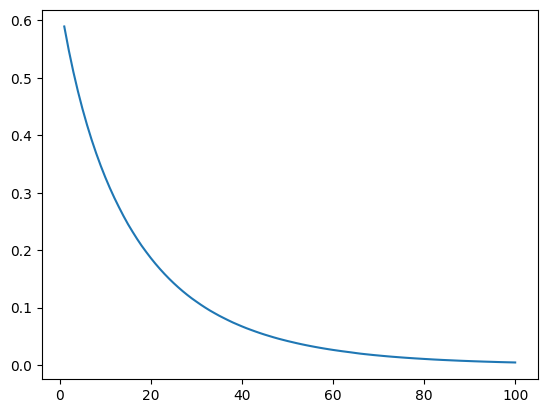

In [45]:
plt.plot(np.arange(1, 101), evals_result['valid']['binary_logloss'])

- 同时带入训练集和测试集并绘制损失值变化曲线

In [51]:
# 创建LightGBM的数据集
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# 设置参数
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 存储评估结果
evals_result = {}

# 训练模型
bst = lgb.train(params, train_data, num_boost_round=100, valid_sets=[train_data, valid_data], valid_names=['train', 'valid'],
                early_stopping_rounds=10, evals_result=evals_result, verbose_eval=10)

# 预测
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred = (y_pred > 0.5).astype(int)

[LightGBM] [Info] Number of positive: 40, number of negative: 80
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

C:\ProgramData\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\anaconda3\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'evals_result' argument is depr

In [52]:
# 评估
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [54]:
# 输出评估结果
print("Evaluation results per iteration:")
for dataset in evals_result.keys():
    for metric, values in evals_result[dataset].items():
        print(f"{dataset} - {metric}:")
        for i, value in enumerate(values):
            print(f"  Iteration {i+1}: {value}")


Evaluation results per iteration:
train - binary_logloss:
  Iteration 1: 0.589509696112102
  Iteration 2: 0.547935229281464
  Iteration 3: 0.5107894475415135
  Iteration 4: 0.47733796255928446
  Iteration 5: 0.44702271296534685
  Iteration 6: 0.41940751890263134
  Iteration 7: 0.3941435808837831
  Iteration 8: 0.3709466633205685
  Iteration 9: 0.34958143971367667
  Iteration 10: 0.3298504382858017
  Iteration 11: 0.3115860250977701
  Iteration 12: 0.2946444619739782
  Iteration 13: 0.2789014113434712
  Iteration 14: 0.2640498240305381
  Iteration 15: 0.2501269620982273
  Iteration 16: 0.23727073348649247
  Iteration 17: 0.22506307361186398
  Iteration 18: 0.21357497282143828
  Iteration 19: 0.2029597988557919
  Iteration 20: 0.1928169890005094
  Iteration 21: 0.18324185725209635
  Iteration 22: 0.1743810429629181
  Iteration 23: 0.16588071994668632
  Iteration 24: 0.15783653361826105
  Iteration 25: 0.15027694844231204
  Iteration 26: 0.14311227094644466
  Iteration 27: 0.1364522900970

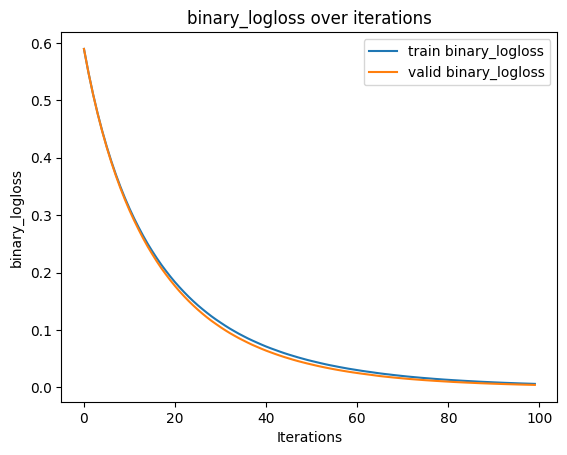

In [55]:
# 可视化每轮迭代的损失值
def plot_metric(evals_result, metric_name):
    for dataset in evals_result.keys():
        metric_values = evals_result[dataset][metric_name]
        plt.plot(metric_values, label=f'{dataset} {metric_name}')
    plt.xlabel('Iterations')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} over iterations')
    plt.legend()
    plt.show()

# 可视化 binary_logloss
plot_metric(evals_result, 'binary_logloss')

- 回归类问题建模流程

In [57]:
data = pd.read_csv("train_encode.csv",index_col=0)
features = data.iloc[:, :80]
labels = data.iloc[:, 80]
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [58]:
X_train.head()

,Id,住宅类型,住宅区域,街道接触面积(英尺),住宅面积,街道路面状况,巷子路面状况,住宅形状(大概),住宅现状,水电气,...,半开放式门廊面积,泳池面积,泳池质量,篱笆质量,其他配置,其他配置的价值,销售月份,销售年份,销售类型,销售状态
235,235.0,12.0,4.0,0.0,6.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,8.0,4.0
1033,1033.0,0.0,3.0,0.0,292.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,4.0
894,894.0,10.0,3.0,35.0,183.0,1.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,8.0,2.0
1379,1379.0,8.0,3.0,44.0,506.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,8.0,4.0
1313,1313.0,5.0,3.0,79.0,943.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,8.0,4.0


In [59]:
y_train.head()

235      89500
1033    230000
894     118858
1379    167500
1313    333168
Name: SalePrice, dtype: int64

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
# 3. 创建LightGBM的数据集
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# 4. 设置参数
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'l2',  # 使用均方误差作为评估指标
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 5. 存储评估结果
evals_result = {}

# 6. 训练模型
bst = lgb.train(params, train_data, num_boost_round=100, valid_sets=[train_data, valid_data], valid_names=['train', 'valid'],
                early_stopping_rounds=10, evals_result=evals_result, verbose_eval=10)

# 7. 预测和评估
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on test data: {mse}')

C:\ProgramData\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\anaconda3\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'evals_result' argument is depr

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3359
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 73
[LightGBM] [Info] Start training from score 182442.585616
Training until validation scores don't improve for 10 rounds
[10]	train's l2: 3.01047e+09	valid's l2: 2.20331e+09
[20]	train's l2: 1.56227e+09	valid's l2: 1.37312e+09
[30]	train's l2: 9.23785e+08	valid's l2: 1.10187e+09
[40]	train's l2: 6.32706e+08	valid's l2: 1.00892e+09
[50]	train's l2: 4.90466e+08	valid's l2: 9.94278e+08
[60]	train's l2: 4.08958e+08	valid's l2: 9.88508e+08
Early stopping, best iteration is:
[57]	train's l2: 4.29686e+08	valid's l2: 9.8783e+08
Mean Squared Error on test data: 987829652.0492798


In [63]:
# 8. 可视化训练集和测试集的损失值变化曲线
def plot_metric(evals_result, metric_name):
    plt.figure(figsize=(10, 5))
    
    for dataset in evals_result.keys():
        metric_values = evals_result[dataset][metric_name]
        plt.plot(metric_values, label=f'{dataset} {metric_name}')
    
    # 设置纵坐标范围，使变化更明显
    plt.ylim(min(metric_values) * 0.9, max(metric_values) * 1.1)
    
    # 添加网格、标题和标签
    plt.grid(True)
    plt.xlabel('Iterations')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} over iterations')
    plt.legend()
    plt.show()

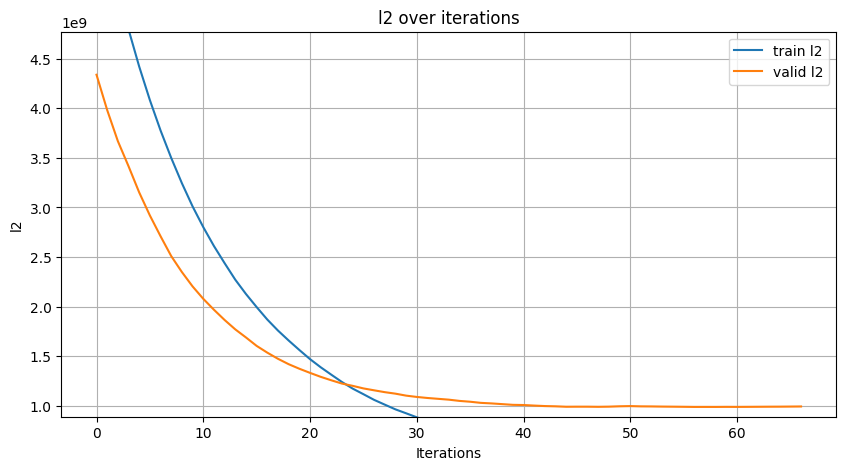

In [64]:
# 可视化 l2 loss
plot_metric(evals_result, 'l2')

- lgb.cv：自动交叉验证训练方法

In [66]:
lgb.cv?

Signature:
lgb.cv(
    params,
    train_set,
    num_boost_round=100,
    folds=None,
    nfold=5,
    stratified=True,
    shuffle=True,
    metrics=None,
    fobj=None,
    feval=None,
    init_model=None,
    feature_name='auto',
    categorical_feature='auto',
    early_stopping_rounds=None,
    fpreproc=None,
    verbose_eval=None,
    show_stdv=True,
    seed=0,
    callbacks=None,
    eval_train_metric=False,
    return_cvbooster=False,
)
Docstring:
Perform the cross-validation with given parameters.

Parameters
----------
params : dict
    Parameters for Booster.
train_set : Dataset
    Data to be trained on.
num_boost_round : int, optional (default=100)
    Number of boosting iterations.
folds : generator or iterator of (train_idx, test_idx) tuples, scikit-learn splitter object or None, optional (default=None)
    If generator or iterator, it should yield the train and test indices for each fold.
    If object, it should be one of the scikit-learn splitter classes
    (https:

lgb.cv特有的一些参数如下：

- nfold: 折数，指定交叉验证的折数（例如 5 表示 5 折交叉验证）。
- stratified: 布尔值，是否进行分层抽样，主要用于分类任务，确保每个折中类别比例一致。
- shuffle: 布尔值，是否在每次分割前进行数据洗牌。
- metrics: 自定义评估指标，可以是一个字符串或列表，指定要监控的评估指标。
- folds: 用户自定义的交叉验证折叠生成器，可以替代 nfold 和 shuffle 参数。
- seed: 随机种子，用于数据分割和特征的随机化。
- eval_train_metric: 布尔值，是否在训练过程中输出训练数据的评估指标。
- return_cvbooster: 布尔值，是否返回交叉验证中的每个模型。

In [89]:
data = pd.read_csv("train_encode.csv",index_col=0)
features = data.iloc[:, :80]
labels = data.iloc[:, 80]
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [90]:
# 3. 创建LightGBM的训练数据集
train_data = lgb.Dataset(X_train, label=y_train)

# 4. 设置参数
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'l2',  # 使用均方误差作为评估指标
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 5. 使用lgb.cv在训练集上进行交叉验证，并记录每轮迭代的训练和验证损失值
cv_results = lgb.cv(params, train_data, num_boost_round=100, nfold=5, stratified=False, shuffle=True,
                    metrics='l2', early_stopping_rounds=10, verbose_eval=10, seed=42, return_cvbooster=True)

C:\ProgramData\anaconda3\lib\site-packages\lightgbm\engine.py:577: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\ProgramData\anaconda3\lib\site-packages\lightgbm\engine.py:620: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002441 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3356
[LightGBM] [Info] Number of data points in the train set: 932, number of used features: 74
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002496 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3356
[LightGBM] [Info] Number of data points in the train set: 932, number of used features: 74
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002523 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3356
[LightGBM] [Info] Number of data points in the train set: 932, number of used features: 74
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002480 seconds.
You can set `force_col_

In [96]:
# 获取每个折叠的模型
cvbooster = cv_results['cvbooster']

# 初始化记录训练集和测试集损失值的列表
train_loss = np.zeros(100)
test_loss = np.zeros(100)

In [97]:
# 在训练集和测试集上计算损失值
for booster in cvbooster.boosters:
    for i in range(1, 101):
        # 预测训练集和测试集
        train_preds = booster.predict(X_train, num_iteration=i)
        test_preds = booster.predict(X_test, num_iteration=i)
        
        # 计算每轮的损失值
        train_loss[i-1] += mean_squared_error(y_train, train_preds)
        test_loss[i-1] += mean_squared_error(y_test, test_preds)

# 平均每个折叠的损失值
train_loss /= len(cvbooster.boosters)
test_loss /= len(cvbooster.boosters)

In [98]:
train_loss

array([6.17734015e+09, 5.69791466e+09, 5.26827077e+09, 4.87044602e+09,
       4.51069728e+09, 4.18446473e+09, 3.88253916e+09, 3.61016548e+09,
       3.36292681e+09, 3.13831471e+09, 2.93176166e+09, 2.74384130e+09,
       2.57324292e+09, 2.41616498e+09, 2.27293617e+09, 2.14107293e+09,
       2.01532710e+09, 1.90550685e+09, 1.80676561e+09, 1.71667908e+09,
       1.62948941e+09, 1.55208644e+09, 1.48103833e+09, 1.41542426e+09,
       1.34857688e+09, 1.28851293e+09, 1.23554069e+09, 1.18395472e+09,
       1.13750904e+09, 1.09609674e+09, 1.05541595e+09, 1.01833852e+09,
       9.85567345e+08, 9.53504588e+08, 9.24835071e+08, 8.99761441e+08,
       8.76329807e+08, 8.52707778e+08, 8.31785983e+08, 8.12311058e+08,
       7.94257519e+08, 7.76803123e+08, 7.61001386e+08, 7.46130540e+08,
       7.30476872e+08, 7.16651668e+08, 7.02943181e+08, 6.90962499e+08,
       6.78724999e+08, 6.66827598e+08, 6.57714442e+08, 6.49134679e+08,
       6.41134474e+08, 6.32385773e+08, 6.25134542e+08, 6.15825611e+08,
      

In [99]:
# 6. 可视化训练集和测试集的损失值变化曲线
def plot_loss(train_loss, test_loss):
    plt.figure(figsize=(10, 5))
    plt.plot(train_loss, label='Train l2 loss')
    plt.plot(test_loss, label='Test l2 loss')

    # 设置纵坐标范围，使变化更明显
    min_loss = min(min(train_loss), min(test_loss))
    max_loss = max(max(train_loss), max(test_loss))
    plt.ylim(min_loss * 0.9, max_loss * 1.1)
    
    # 添加网格、标题和标签
    plt.grid(True)
    plt.xlabel('Iterations')
    plt.ylabel('l2 loss')
    plt.title('l2 loss over iterations')
    plt.legend()
    plt.show()

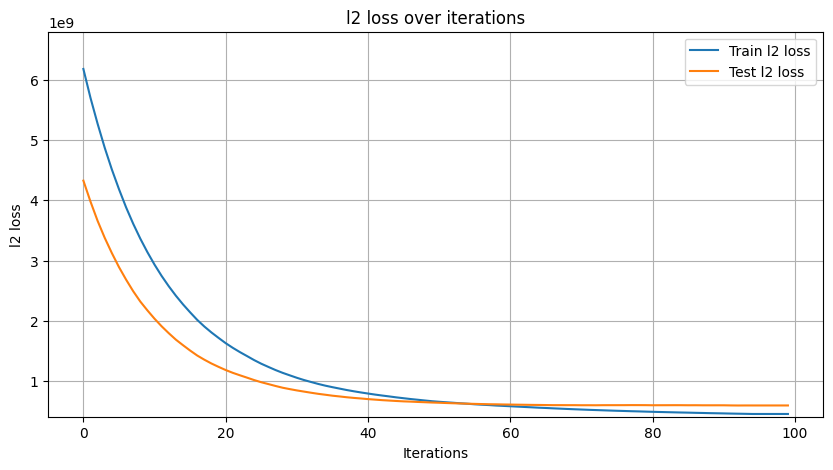

In [100]:
# 可视化训练集和测试集的 l2 loss
plot_loss(train_loss, test_loss)

- 超参数优化

In [104]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK

In [123]:
data = pd.read_csv("train_encode.csv",index_col=0)
features = data.iloc[:, :80]
labels = data.iloc[:, 80]
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

# 创建LightGBM的训练数据集
train_data = lgb.Dataset(X_train, label=y_train)

In [124]:
# 定义参数空间
param_space = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'l2',
    'num_leaves': hp.choice('num_leaves', range(20, 150)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'feature_fraction': hp.uniform('feature_fraction', 0.5, 1.0),
    'bagging_fraction': hp.uniform('bagging_fraction', 0.5, 1.0),
    'bagging_freq': hp.choice('bagging_freq', range(1, 10)),
    'min_data_in_leaf': hp.choice('min_data_in_leaf', range(20, 150)),
    'max_depth': hp.choice('max_depth', range(5, 20)),
    'lambda_l1': hp.uniform('lambda_l1', 0.0, 1.0),
    'lambda_l2': hp.uniform('lambda_l2', 0.0, 1.0),
    'feature_pre_filter': False,  
    'verbose': -1  # 设置为-1来减少输出信息
}

In [125]:
def objective(params):
    # 每次运行时创建新的Dataset对象
    train_data = lgb.Dataset(X_train, label=y_train)
    
    # 使用lgb.cv进行交叉验证
    cv_results = lgb.cv(params, train_data, num_boost_round=200, nfold=5, stratified=False, shuffle=True,
                        metrics='l2', early_stopping_rounds=10, verbose_eval=False, seed=42)
    
    # 获取最小的均方误差
    best_loss = min(cv_results['l2-mean'])
    
    # 返回结果
    return {'loss': best_loss, 'status': STATUS_OK}

In [126]:
# 运行Hyperopt进行优化
trials = Trials()
best = fmin(fn=objective, space=param_space, algo=tpe.suggest, max_evals=100, trials=trials)

# 打印最佳参数
print("Best parameters:", best)

100%|███████████████████████████████████████████████| 100/100 [02:23<00:00,  1.44s/trial, best loss: 859524088.5574011]
Best parameters: {'bagging_fraction': 0.8759194287838374, 'bagging_freq': 2, 'feature_fraction': 0.765689824487926, 'lambda_l1': 0.8743034530892744, 'lambda_l2': 0.8651826035007084, 'learning_rate': 0.12072801746249853, 'max_depth': 8, 'min_data_in_leaf': 3, 'num_leaves': 72}


In [127]:
# 将最佳参数转换为完整的参数字典
best_params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'l2',
    'num_leaves': best['num_leaves'],
    'learning_rate': best['learning_rate'],
    'feature_fraction': best['feature_fraction'],
    'bagging_fraction': best['bagging_fraction'],
    'bagging_freq': best['bagging_freq'],
    'min_data_in_leaf': best['min_data_in_leaf'],
    'max_depth': best['max_depth'],
    'lambda_l1': best['lambda_l1'],
    'lambda_l2': best['lambda_l2'],
    'feature_pre_filter': False,
    'verbose': -1
}

In [128]:
# 重新创建训练数据集
train_data = lgb.Dataset(X_train, label=y_train)

# 训练最终模型
bst = lgb.train(best_params, train_data, num_boost_round=100)

In [129]:
# 在测试集上进行预测
y_test_pred = bst.predict(X_test)

# 计算均方误差
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error on test data: {test_mse}')

Mean Squared Error on test data: 689005073.3691775
